In [245]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [266]:
# 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [268]:
# 컬렴명 확인
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [270]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

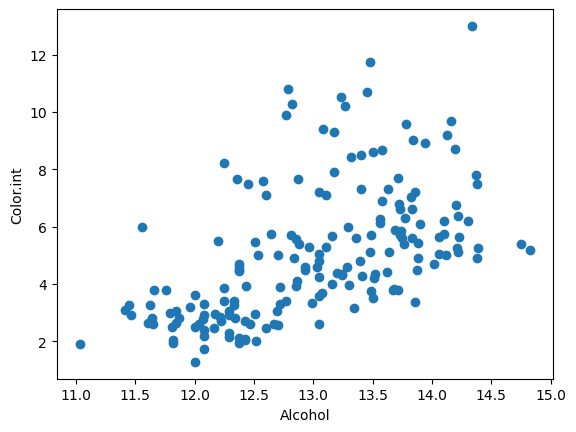

In [272]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Alcohol'], df['Color.int'])
plt.xlabel('Alcohol')
plt.ylabel('Color.int')

plt.show()

In [274]:
# 입력(X)과 출력(y) 분리
X = df.drop('Wine', axis=1)
y = df['Wine'].astype(int) - 1  # 클래스 0,1,2로 변환

In [276]:
# One-hot 인코딩
Y = pd.get_dummies(y).values

In [278]:
# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [280]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=y  # stratify로 클래스 분포 유지
)


In [282]:
# 클래스 가중치 계산
y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_integers),
    y=y_integers
)
class_weights = dict(enumerate(class_weights))


In [292]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential()
model.add(Input(shape=(13,)))   # ✅ 여기서 입력 정의
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [294]:
# 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    class_weight=class_weights  # ✅ 적용
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6304 - loss: 0.7233 - val_accuracy: 0.9444 - val_loss: 0.2339
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9978 - loss: 0.1002 - val_accuracy: 0.9722 - val_loss: 0.0744
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9840 - loss: 0.0215 - val_accuracy: 0.9722 - val_loss: 0.0889
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 6.1343e-04 - val_accuracy: 0.9444 - val_loss: 0.2079
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 9.8520e-04 - val_accuracy: 0.9444 - val_loss: 0.2479
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 3.8134e-04 - val_accuracy: 0.9444 - val_loss: 0.2214
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 2.1025e-04 - val_accuracy: 0.9444 - val_loss: 0.1907
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 1.6844e-04 - val_accuracy: 0.9444

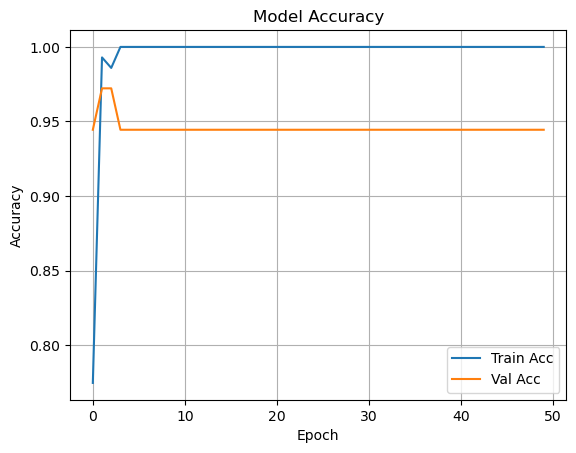

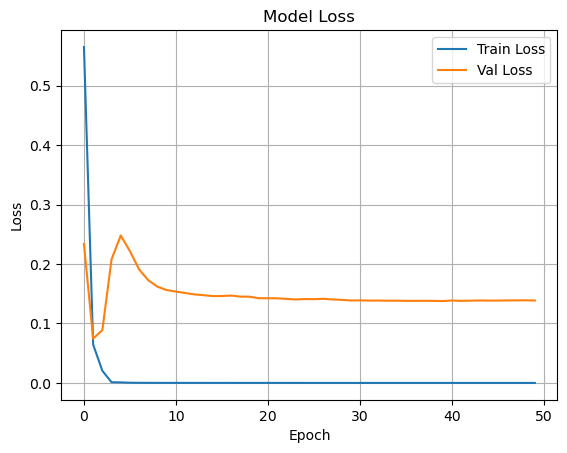

In [295]:
# 정확도 & 손실 시각화
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [296]:
# 평가
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print("\n[Classification Report]")
print(classification_report(y_test_class, y_pred_class, zero_division=0))

print("\n[Confusion Matrix]")
print(confusion_matrix(y_test_class, y_pred_class))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

[Classification Report]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


[Confusion Matrix]
[[12  0  0]
 [ 1 13  0]
 [ 0  1  9]]



[Classification Report]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


[Confusion Matrix]
[[12  0  0]
 [ 1 13  0]
 [ 0  1  9]]


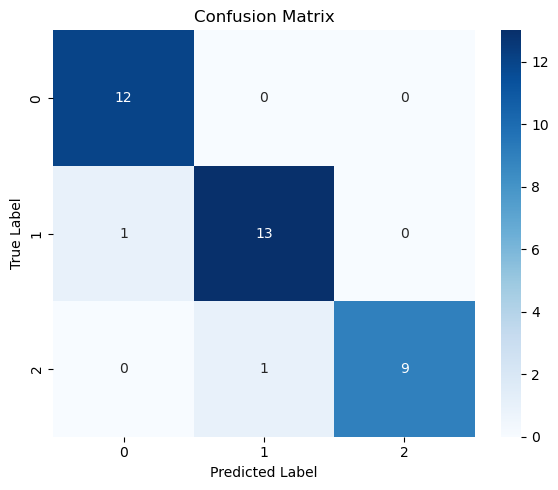

In [303]:
print("\n[Classification Report]")
print(classification_report(y_test_class, y_pred_class, zero_division=0))

print("\n[Confusion Matrix]")
conf_mat = confusion_matrix(y_test_class, y_pred_class)
print(conf_mat)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [305]:
#하이퍼파라미터 튜닝-학습률 변경
for lr in [0.1, 0.01, 0.001]:
    model = Sequential()
    model.add(Input(shape=(13,)))
    model.add(Dense(64, activation='relu')) #은닉층 구성: 각각 64, 32, 16개의 뉴런, 활성화 함수는 ReLU
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax')) #출력층: 클래스가 3개 → 뉴런 3개, 다중 분류용 softmax 사용

    model.compile(optimizer=Adam(learning_rate=lr),#Adam 옵티마이저에 지금 반복 중인 learning rate lr을 넣음.
                  loss='categorical_crossentropy',#다중 분류용 손실 함수 categorical_crossentropy 설정.
                  metrics=['accuracy'])#정확도(accuracy)를 평가 지표로 설정.

    print(f"\n===== Learning Rate: {lr} =====")
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=16,
                        validation_data=(X_test, y_test),
                        class_weight=class_weights,
                        verbose=0)
    
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"최종 검증 정확도: {final_val_acc:.4f}")


===== Learning Rate: 0.1 =====
최종 검증 정확도: 0.9444

===== Learning Rate: 0.01 =====
최종 검증 정확도: 0.9722

===== Learning Rate: 0.001 =====
최종 검증 정확도: 0.9722


In [307]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

batch_sizes = [8, 16, 32]

for batch in batch_sizes:
    # 1. 모델 구성
    model = Sequential()
    model.add(Input(shape=(13,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # 2. 컴파일
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 3. 학습
    print(f"\n===== Batch Size: {batch} =====")
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=batch,
                        validation_data=(X_test, y_test),
                        class_weight=class_weights,
                        verbose=0)
    
    # 4. 결과 출력
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"최종 검증 정확도: {final_val_acc:.4f}")


===== Batch Size: 8 =====
최종 검증 정확도: 0.9722

===== Batch Size: 16 =====
최종 검증 정확도: 0.9444

===== Batch Size: 32 =====
최종 검증 정확도: 0.9722
